# Sturdy-Octo-Disco-Adding-Sunglasses-for-a-Cool-New-Look #
# Name:K Charan Teja #
# Reg no:212224040163 #

Text(0.5, 1.0, 'face')

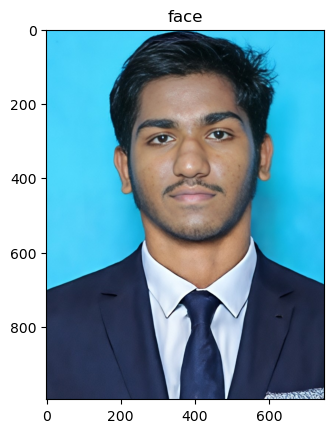

In [31]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the Face Image
faceimage=cv2.imread("charan 1.jpg")
plt.imshow(faceimage[:,:,::-1]);plt.title("face")

In [32]:
faceimage.shape

(996, 748, 3)

In [33]:
#resized_faceImage.shape
faceimage.shape

(996, 748, 3)

Text(0.5, 1.0, 'GLASSPNG')

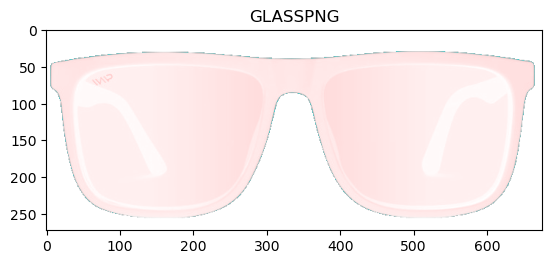

In [34]:
# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glasspng=cv2.imread('sunglasses.png',-1)
plt.imshow(glasspng[:,:,::-1]);plt.title("GLASSPNG")

In [35]:
# Resize the image to fit over the eye region
glasspng=cv2.resize(glasspng,(170,80))
print("image Dimension={}".format(glasspng.shape))

image Dimension=(80, 170, 4)


BGR shape: (273, 676, 3)
Alpha shape: (273, 676)


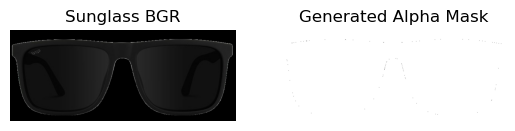

In [36]:
import cv2
import matplotlib.pyplot as plt

# Load sunglasses (only BGR since no alpha channel exists in your file)
glasspng = cv2.imread("sunglasses.png")

# Split BGR channels
b, g, r = cv2.split(glasspng)
glass_bgr = cv2.merge((b, g, r))

# Convert to grayscale to prepare alpha mask
gray = cv2.cvtColor(glasspng, cv2.COLOR_BGR2GRAY)

# Threshold to create alpha mask (tune threshold=240 depending on bg color)
_, glass_alpha = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

print("BGR shape:", glass_bgr.shape)
print("Alpha shape:", glass_alpha.shape)

# Show sunglasses BGR
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(glass_bgr, cv2.COLOR_BGR2RGB))
plt.title("Sunglass BGR")
plt.axis("off")

# Show generated alpha mask
plt.subplot(1,2,2)
plt.imshow(glass_alpha, cmap="gray")
plt.title("Generated Alpha Mask")
plt.axis("off")

plt.show()

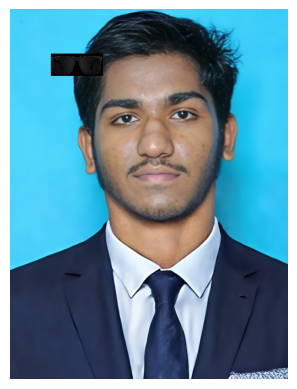

In [38]:
import cv2
import matplotlib.pyplot as plt

# Load the face image
faceimage = cv2.imread('charan 1.jpg')

# Load the sunglasses image
# Make sure the sunglasses image has the same size as the eye region or resize it
glass = cv2.imread('sunglasses.png')  # Replace with path to your sunglass image
glass = cv2.resize(glass, (140, 60))  # Resize to match region [100:180, 110:250]

# Make a copy of the face image
facewithglassesnaive = faceimage.copy()

# Replace the eye region with the sunglasses image
facewithglassesnaive[120:180, 110:250] = glass

# Show the result
plt.imshow(cv2.cvtColor(facewithglassesnaive, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

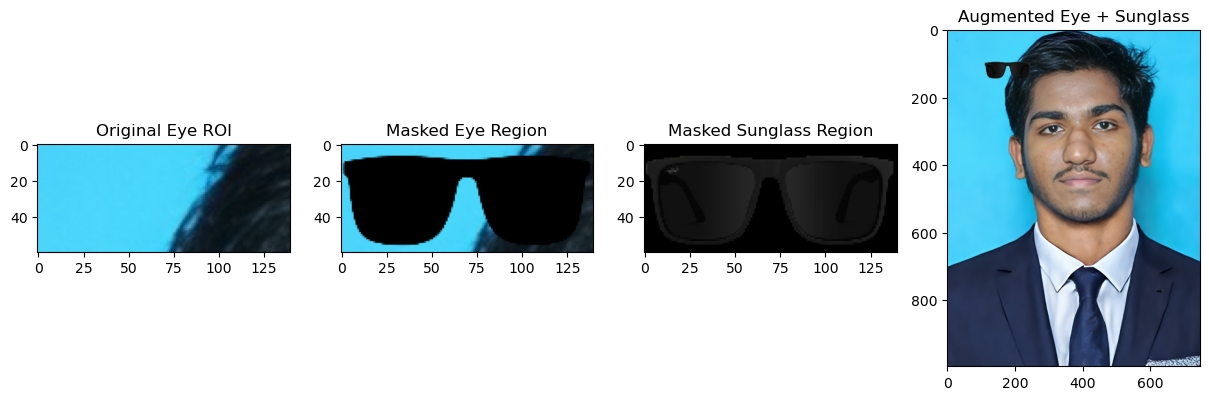

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Load images ----------------
faceimage = cv2.imread("charan 1.jpg")   # your face image
glasspng  = cv2.imread("sunglasses.png", cv2.IMREAD_UNCHANGED)  # sunglasses (with/without alpha)

if faceimage is None:
    raise FileNotFoundError("❌ Could not load faceimage.png")
if glasspng is None:
    raise FileNotFoundError("❌ Could not load sunglass.png")

# ---------------- Process sunglasses ----------------
if glasspng.shape[2] == 4:  # has alpha channel
    b, g, r, a = cv2.split(glasspng)
    glassbgr   = cv2.merge((b, g, r))   # sunglasses only
    glassmask1 = a                      # alpha channel
else:  # no alpha channel → make mask
    b, g, r = cv2.split(glasspng)
    glassbgr = cv2.merge((b, g, r))
    gray = cv2.cvtColor(glassbgr, cv2.COLOR_BGR2GRAY)
    _, glassmask1 = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# ---------------- Eye region coordinates ----------------
y1, y2 = 90, 150
x1, x2 = 110, 250

# Resize glasses + mask to fit ROI
glassbgr   = cv2.resize(glassbgr, (x2-x1, y2-y1))
glassmask1 = cv2.resize(glassmask1, (x2-x1, y2-y1))

# Make 3-channel mask for blending
glassmask   = cv2.merge((glassmask1, glassmask1, glassmask1))
glassmask   = glassmask.astype(float) / 255.0  # scale 0-1

# ---------------- Extract Eye ROI ----------------
eyeroi = faceimage[y1:y2, x1:x2].astype(float)

# ---------------- Masked regions ----------------
maskedeye   = (eyeroi * (1 - glassmask)).astype(np.uint8)
maskedglass = (glassbgr * glassmask).astype(np.uint8)

# ---------------- Final augmented region ----------------
eyeroifinal = cv2.add(maskedeye, maskedglass)

# Put it back into the face
face_with_glasses = faceimage.copy()
face_with_glasses[y1:y2, x1:x2] = eyeroifinal

# ---------------- Show results ----------------
plt.figure(figsize=(15,5))
plt.subplot(141); plt.imshow(eyeroi[...,::-1].astype(np.uint8)); plt.title("Original Eye ROI")
plt.subplot(142); plt.imshow(maskedeye[...,::-1]); plt.title("Masked Eye Region")
plt.subplot(143); plt.imshow(maskedglass[...,::-1]); plt.title("Masked Sunglass Region")
plt.subplot(144); plt.imshow(face_with_glasses[...,::-1]); plt.title("Augmented Eye + Sunglass")
plt.show()

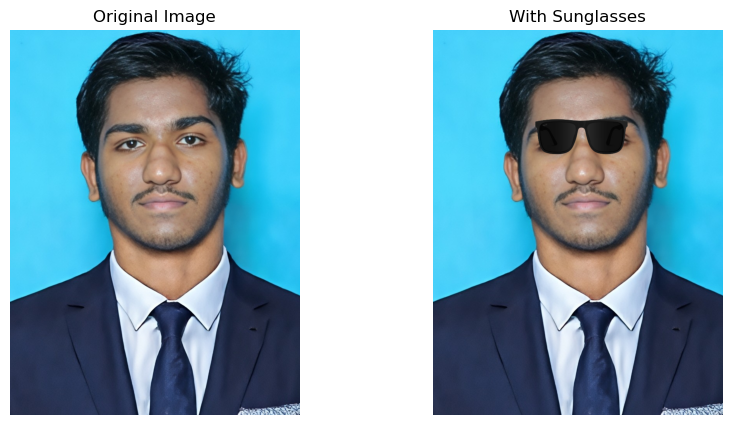

In [40]:


# Load face image
face = cv2.imread('charan 1.jpg')
face_with_glasses = face.copy()

# Load sunglasses with alpha channel
glass = cv2.imread('sunglasses.png', cv2.IMREAD_UNCHANGED)

# Convert face to gray
gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

# Load Haarcascade for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Detect eyes
eyes = eye_cascade.detectMultiScale(gray, 1.1, 6)

# Sort eyes (left then right)
eyes = sorted(eyes, key=lambda b: b[0])

# Continue only if at least two eyes detected
if len(eyes) >= 2:
    x1, y1, w1, h1 = eyes[0]
    x2, y2, w2, h2 = eyes[1]

    # Calculate sunglasses width based on eye distance
    glass_width = (x2 + w2) - x1
    glass_height = int(glass_width * 0.45)

    # Resize sunglasses
    glass_resized = cv2.resize(glass, (glass_width, glass_height))

    # Placement coordinates
    y_offset = min(y1, y2) - int(glass_height * 0.25)
    x_offset = x1

    # Overlay sunglasses with alpha blending
    for c in range(3):
        alpha_s = glass_resized[:, :, 3] / 255.0
        alpha_f = 1.0 - alpha_s

        face_with_glasses[
            y_offset:y_offset + glass_height,
            x_offset:x_offset + glass_width,
            c
        ] = (
            alpha_s * glass_resized[:, :, c]
            + alpha_f * face_with_glasses[
                y_offset:y_offset + glass_height,
                x_offset:x_offset + glass_width,
                c
            ]
        )

else:
    print("Could not detect two eyes!")

# Show result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(face_with_glasses, cv2.COLOR_BGR2RGB))
plt.title("With Sunglasses")
plt.axis("off")

plt.show()
